**Shared Copy - Telco Customer Churn Data** \\
Created by: Agatha Manzo \\
Sample Dataset from Kaggle

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading Dataset

In [ ]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Access file path
path = '/content/drive/My Drive/Kaggle Datasets/Telco-Customer-Churn.csv'

telco = pd.read_csv(path)

In [ ]:
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#Uncomment to check the mounted drive files
#!ls "/content/drive/My Drive"

In [ ]:
print('Dataset shape: ', telco.shape)
print('Dataset columns: ', telco.columns)

Dataset shape:  (7043, 21)
Dataset columns:  Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [ ]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Missing Data

In [ ]:
#Check for null values
for i in telco.columns:
  print(str(i)+': ', telco[i].isnull().sum())

customerID:  0
gender:  0
SeniorCitizen:  0
Partner:  0
Dependents:  0
tenure:  0
PhoneService:  0
MultipleLines:  0
InternetService:  0
OnlineSecurity:  0
OnlineBackup:  0
DeviceProtection:  0
TechSupport:  0
StreamingTV:  0
StreamingMovies:  0
Contract:  0
PaperlessBilling:  0
PaymentMethod:  0
MonthlyCharges:  0
TotalCharges:  0
Churn:  0


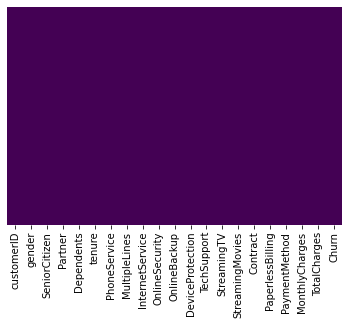

In [ ]:
sns.heatmap(telco.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
#for i in telco.columns:
#  print(str(i)+': ', telco[i].isna().sum())

In [ ]:
telco = telco.drop(telco[telco['TotalCharges'] == '  '].index)

In [ ]:
telco['TotalCharges'] = telco['TotalCharges'].replace(" ",np.nan)

In [ ]:
telco = telco.dropna()

In [ ]:
pd.to_numeric(telco['TotalCharges'])

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [ ]:
telco.shape

(7032, 21)

In [ ]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


# Data Exploration

In [ ]:
telco_gender = telco.groupby('gender')['customerID'].count()
print(telco_gender.head())

gender
Female    3483
Male      3549
Name: customerID, dtype: int64


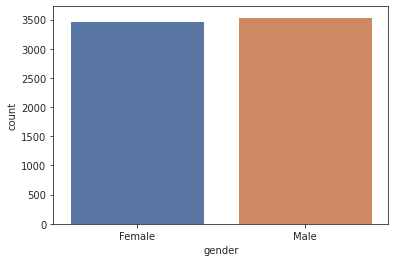

In [ ]:
sns.set_style('ticks')
sns.countplot(x ='gender', data = telco, palette = 'deep')

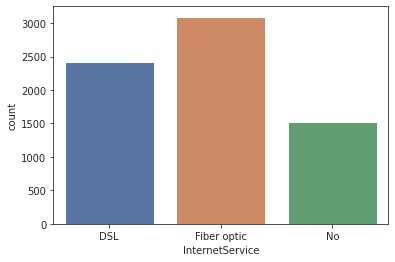

In [ ]:
telco_InternetService = telco.groupby('InternetService')['customerID'].count()
sns.set_style('ticks')
sns.countplot(x ='InternetService', data = telco, palette = 'deep')

In [ ]:
telco.groupby('Contract')['customerID'].count()


Contract
Month-to-month    3875
One year          1472
Two year          1685
Name: customerID, dtype: int64

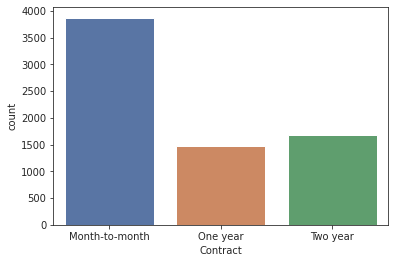

In [ ]:
sns.set_style('ticks')
sns.countplot(x ='Contract', data = telco, palette = 'deep')

In [ ]:
#Add binary values for Churn column
telco['Churn_binary'] = telco['Churn'].map({'Yes': 1, 'No': 0})
telco['Churn_binary'].head(10)

0    0
1    0
2    1
3    0
4    1
5    1
6    0
7    0
8    1
9    0
Name: Churn_binary, dtype: int64

Text(0.5, 0, 'Churn')

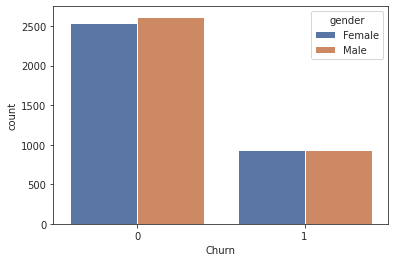

In [ ]:
sns.set_style('ticks')
ax = sns.countplot(x='Churn_binary',hue='gender',data=telco,palette='deep')
ax.set_xlabel('Churn')

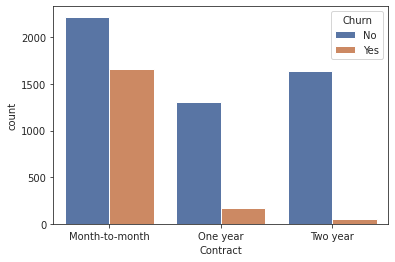

In [ ]:
sns.set_style('ticks')
sns.countplot(x ='Contract', hue='Churn',data = telco, palette = 'deep')

In [ ]:
telco['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [ ]:
telco['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

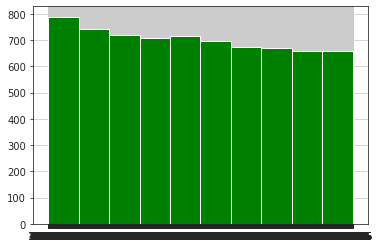

In [ ]:
#ax = sns.histplot(data=telco, x='TotalCharges', bins=10)
telco['TotalCharges'].hist(color='green', bins=10)

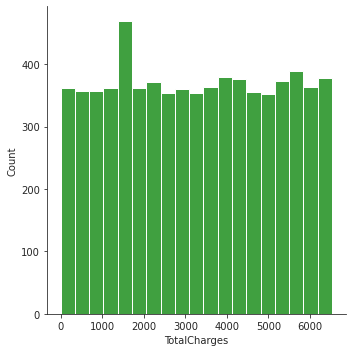

In [ ]:
sns.displot(telco['TotalCharges'],color='green')

In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [ ]:
telco['TotalCharges']

In [ ]:
telco = telco.apply(lambda x: object_to_int(x))
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_binary
0,5365,0,0,1,0,1,0,1,0,0,...,0,0,0,0,1,2,29.85,2504,0,0
1,3953,1,0,0,0,34,1,0,0,2,...,0,0,0,1,0,3,56.95,1465,0,0
2,2558,1,0,0,0,2,1,0,0,2,...,0,0,0,0,1,3,53.85,156,1,1
3,5524,1,0,0,0,45,0,1,0,2,...,2,0,0,1,0,0,42.30,1399,0,0
4,6500,0,0,0,0,2,1,0,1,0,...,0,0,0,0,1,2,70.70,924,1,1


# Converting Categorical Features

In [ ]:
pd.get_dummies(telco['gender'])


In [ ]:
train = pd.DataFrame()

In [ ]:
#Create separate dataframe for training

train['Gender'] = pd.get_dummies(telco['gender'],drop_first=True)  #0-female; 1-male
train['Churn'] = pd.get_dummies(telco['Churn'], drop_first=True)
train['Dependents'] = pd.get_dummies(telco['Dependents'], drop_first=True)
train['Partner'] = pd.get_dummies(telco['Partner'], drop_first=True)

In [ ]:
train['Internet_Service'] = telco['InternetService'].map({'Fiber optic': 1, 'DSL':1,'No': 0})

In [ ]:
train['Senior_Citizen'] = telco['SeniorCitizen']

In [ ]:
telco.columns
#telco.head()

In [ ]:
train['Streaming_TV'] = telco['StreamingTV'].map({'No internet service': 0, 'Yes':1,'No': 0})
train['Streaming_Movies'] = telco['StreamingMovies'].map({'No internet service': 0, 'Yes':1,'No': 0})
train['PaperlessBilling']=pd.get_dummies(telco['PaperlessBilling'], drop_first=True)


In [ ]:
telco['StreamingMovies'].value_counts()

In [ ]:
train['Total_Charges'] = telco['TotalCharges']

In [ ]:
train['Tenure'] = telco['tenure']

In [ ]:
# #train.drop(train[train['Total_Charges'] == ''].index, inplace=True) 
# #df.drop(df[df['Age'] < 25].index, inplace = True)
# #train.info()
# pd.to_numeric(train['Total_Charges'])

In [ ]:
train.head()

In [ ]:
#train = train.dropna(488, axis=0)

In [ ]:
#train['Total_Charges'] = pd.to_numeric(train['Total_Charges'])

In [ ]:
#train.pop('ID')
train.insert(0, 'CustomerID', telco.index +1)

In [ ]:
train.head(755)

In [ ]:
train.columns

In [ ]:
train.head()

In [ ]:
train.info()

# Building a Model

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Churn',axis=1), 
                                                    train['Churn'], test_size=0.30, 
                                                    random_state=101)


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
predictions

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predictions))

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,predictions)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
y_score = logmodel.predict_proba(X_test)[:,1]

In [ ]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)

In [ ]:
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score))

In [ ]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
#train['Total_Charges'].dtype(float)
train['Total_Charges'] = pd.to_numeric(train['Total_Charges'], errors='coerce')

In [ ]:
train.info()

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(train.drop('Churn',axis=1), 
                                                    train['Churn'], test_size=0.30, 
                                                    random_state=101)

In [ ]:
regressor = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)

In [ ]:
regressor = xgb.XGBClassifier()

In [ ]:
regressor.fit(X_train1, y_train1)

In [ ]:
y_pred1 = regressor.predict(X_test1)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_test1, y_pred1)

In [ ]:
y_score1 = regressor.predict_proba(X_test1)[:,1]

In [ ]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test1, y_score1)

In [ ]:
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test1, y_score1))

In [ ]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
print(confusion_matrix(y_test1,y_pred1))

In [ ]:
y_pred1